# Ex-Yugoslavian countries - 25 years later

**Author:** Miran T.  
**Last update:** 2016-08-31

&nbsp;

Yugoslavia ([SFRY](https://en.wikipedia.org/wiki/Socialist_Federal_Republic_of_Yugoslavia)) was a socialist state in south-eastern Europe, founded in 1945. It was a federation made up of six socialist republics, in alphabetical order:
* Bosnia and Herzegovina
* Croatia
* Macedonia
* Montenegro
* Serbia
* Slovenia

In this notebook, we'll take a look at the development statistics of these countries in the last 25 years, after the Yugoslavian dissolution in '90s.  

Table of contents:  
 * [Data Preparation](#Data-Preparation)
 * [Demography](#Demography)
 * [Education](#Education)
 * [Economy](#Economy)
 * [Conclusion](#Conclusion)

### Update  

For a notebook with **updated and corrected data** from [The World Bank](http://data.worldbank.org/data-catalog/world-development-indicators) (this updated data is not available on Kaggle) click **[here](https://nbviewer.jupyter.org/github/narimiran/data-notebooks/blob/master/ex-yu.ipynb)**.

## Data Preparation

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.5)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams['legend.fontsize'] = 11

In [2]:
database = '../input/database.sqlite'

with sqlite3.connect(database) as con:
    df = pd.read_sql_query(
        """
        SELECT *
        FROM Indicators
        WHERE CountryCode in ('BIH', 'HRV', 'MKD', 'MNE', 'SRB', 'SVN', 'EUU')
        """,
        con
    )

df.loc[df.CountryCode == 'EUU', 'CountryName'] = 'avg. EU'
df.loc[df.CountryCode == 'MKD', 'CountryName'] = 'Macedonia'
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132318 entries, 0 to 132317
Data columns (total 6 columns):
CountryName      132318 non-null object
CountryCode      132318 non-null object
IndicatorName    132318 non-null object
IndicatorCode    132318 non-null object
Year             132318 non-null int64
Value            132318 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [3]:
colors = {
    'Bosnia and Herzegovina': "#66C2A5",
    'Croatia': "#FA8D62",
    'Macedonia': "#FED82F",
    'Montenegro': "#E68AC3",
    'Serbia': "#8D9FCA",
    'Slovenia': "#A6D853",
    'avg. EU': "#CCCCCC"
}

def plot_indicator(indicators, title=None, 
                   xlim=None, ylim=None, xlabel='Year',
                   loc=0, loc2=0,
                   drop_eu=False):
    
    lines = ['-', '--']
    line_styles = []
    fig, ax = plt.subplots()
    
    indicators = indicators if isinstance(indicators, list) else [indicators]
    
    for line, (name, indicator) in zip(lines, indicators):
        ls, = plt.plot(np.nan, linestyle=line, color='#999999')
        line_styles.append([ls, name])

        df_ind = df[(df.IndicatorCode == indicator) & (df.Year >= 1990)]
        group = df_ind.groupby(['CountryName'])
        
        for country, values in group:
            country_values = values.groupby('Year').mean()
            
            if country == 'avg. EU':
                if drop_eu:
                    continue
                ax.plot(country_values, label=country, 
                        linestyle='--', color='#666666', linewidth=1.5, zorder=0)
            elif country_values.shape[0] > 1:
                ax.plot(country_values, label=country, linestyle=line,
                        color=colors[country], linewidth=2.5)
        
        if line == lines[0]:
            legend = plt.legend(loc=loc)

    ax.set_xlabel(xlabel)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    plt.tight_layout()
    fig.subplots_adjust(top=0.94)
    
    
    if title:
        ax.set_title(title)
    else:
        ax.set_title(df_ind.IndicatorName.values[0])
    
    if len(indicators) > 1:
        plt.legend(*zip(*line_styles), loc=loc2)
        ax.add_artist(legend)

## Demography

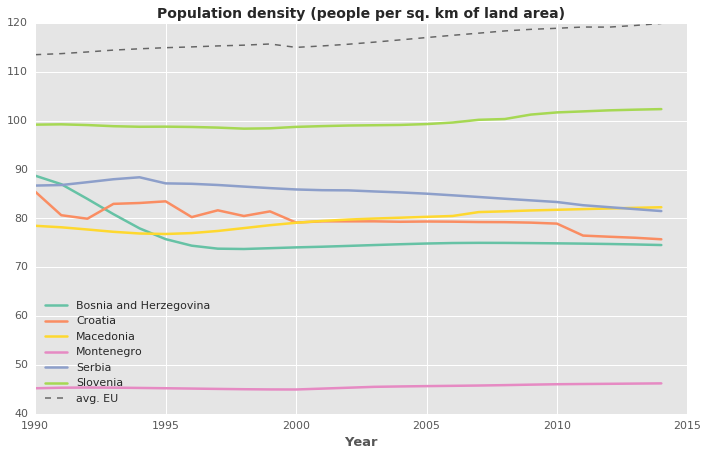

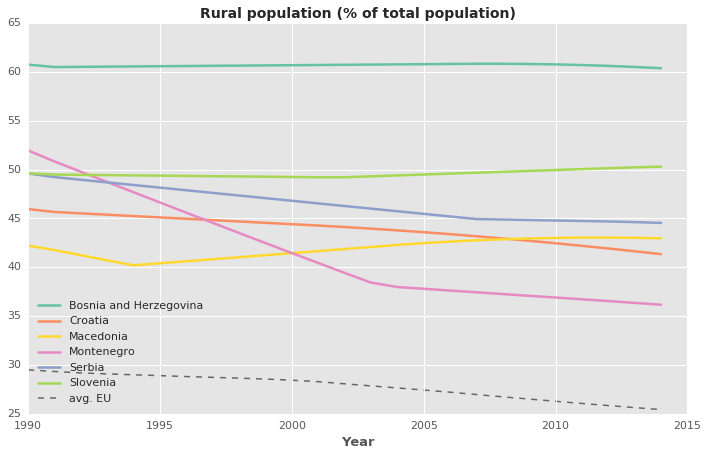

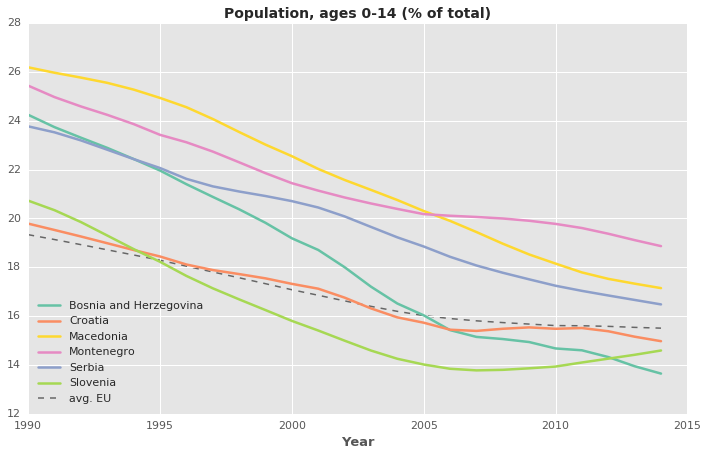

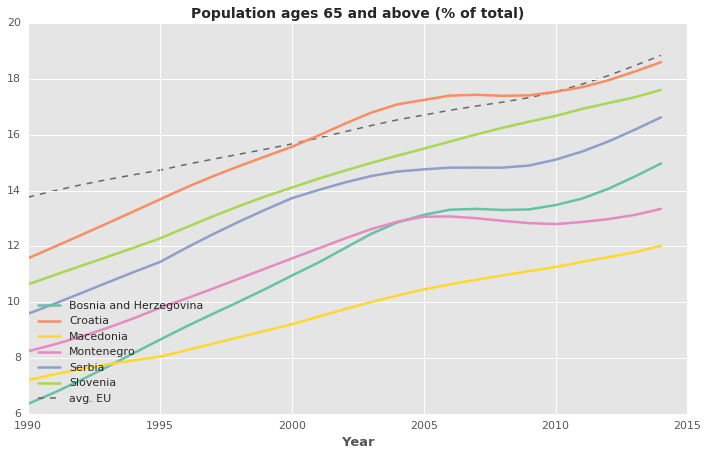

In [4]:
population = [
    ('pop_dens', 'EN.POP.DNST'),     # Population density 
    ('rural', 'SP.RUR.TOTL.ZS'),     # Rural population 
    ('under14', 'SP.POP.0014.TO.ZS'),# Population, ages 0-14 
    ('above65', 'SP.POP.65UP.TO.ZS'),# Population ages 65 and above 
]

for indicator in population:
    plot_indicator(indicator, loc=3)

Population density hasn't changed much, with the exeption of Bosnia in early '90s, due to [war in Bosnia](https://en.wikipedia.org/wiki/Bosnian_War).  

Bosnia and Slovenia have constantly high percentage of rural population (60 and 50 percent, respectively), while other countries have slightly lower and slowly decreasing values, but still much higher than EU average.

Last two figures show that all countries are getting older.  
The situation is the worst in Bosnia, where the number of children aged 14 or less has halved from the value in 1990, while number of people older than 65 more than doubled.

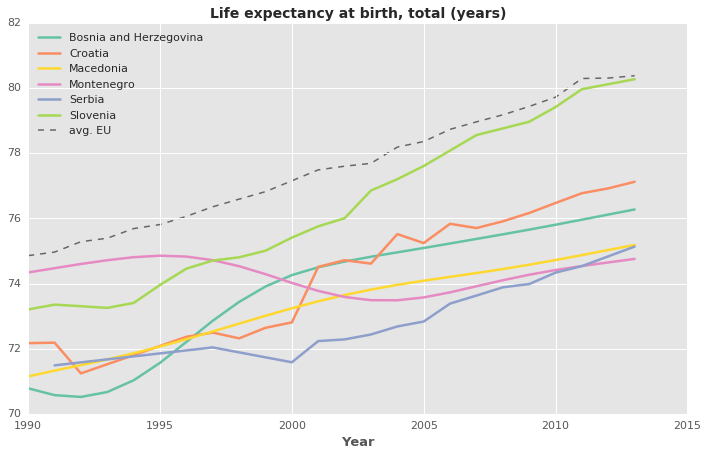

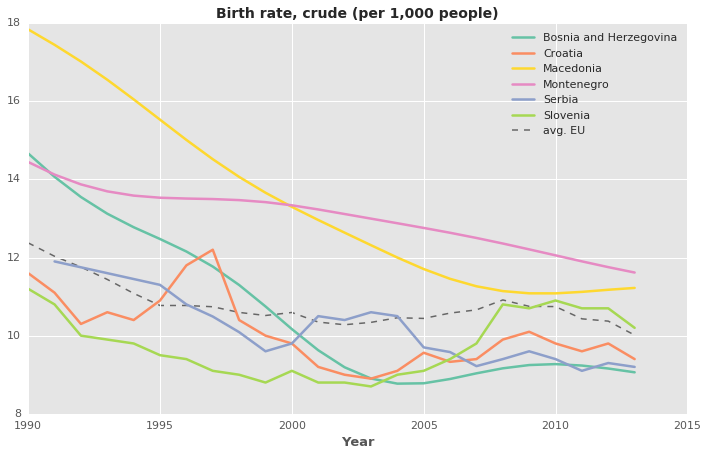

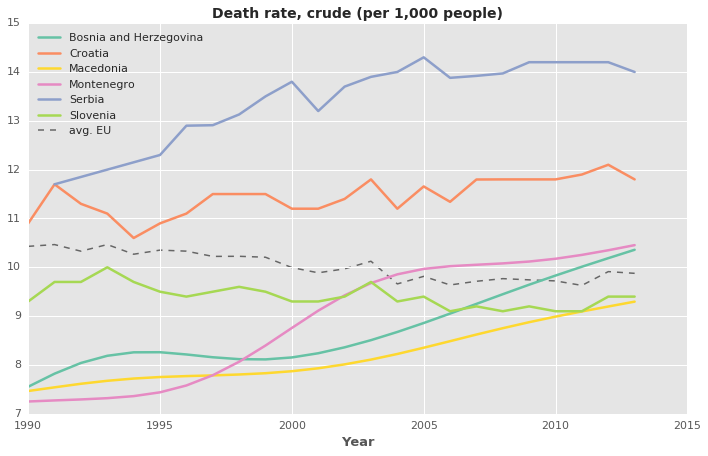

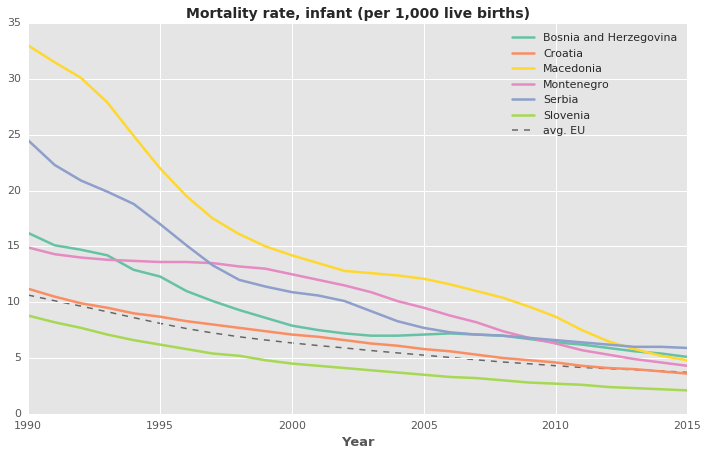

In [5]:
birth_death = [
    ('life_exp', 'SP.DYN.LE00.IN'), # Life expectancy at birth
    ('birth', 'SP.DYN.CBRT.IN'),    # Birth rate, crude 
    ('death', 'SP.DYN.CDRT.IN'),    # Death rate, crude 
    ('mort', 'SP.DYN.IMRT.IN'),     # Mortality rate, infant 
]

for indicator in birth_death:
    plot_indicator(indicator, loc=0)

What a difference 25 years make! Life expectancy in EU for children born today is 5 years more than for children born in 1990, and infant mortality rate halved. 
Slovenia has even bigger growth of life expectancy, and today's value is the same as EU average. On the other hand, Montenegro had highest life expectancy in 1990 of ex-YU countries, but had no growth in the last 25 years, and today is in the last place.

All countries now have lower birth rates than 25 years ago. Birth rates in Bosnia have halved in only 15 years.

Slovenia has managed to keep the same death rate. In the other countries death rate increased in recent years.

Today's infant mortality rate in all ex-YU countries is close to EU average. In 1990 only Croatia and Slovenia had values similar to European. The average infant mortality rate of the other four ex-YU countries in 1990 was around 22 per 1000 live births. Lots of progress has been made!

## Education

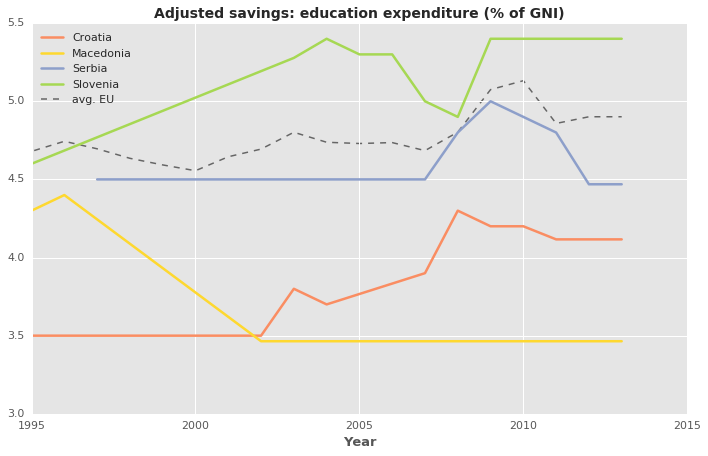

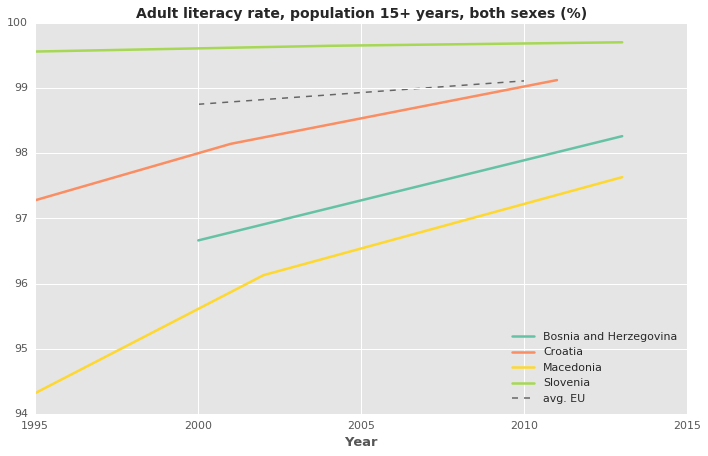

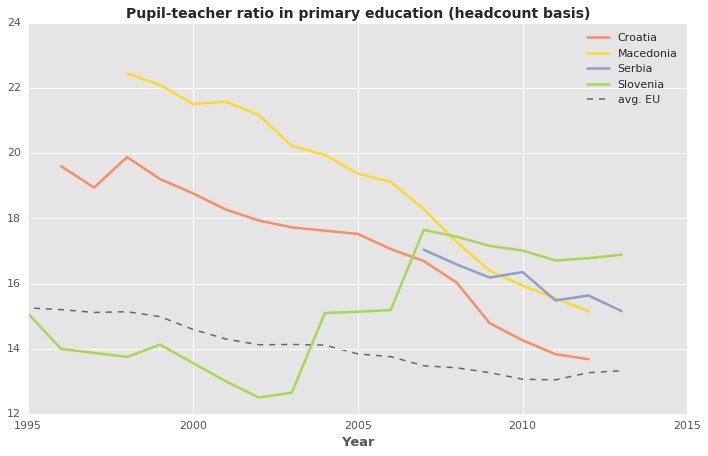

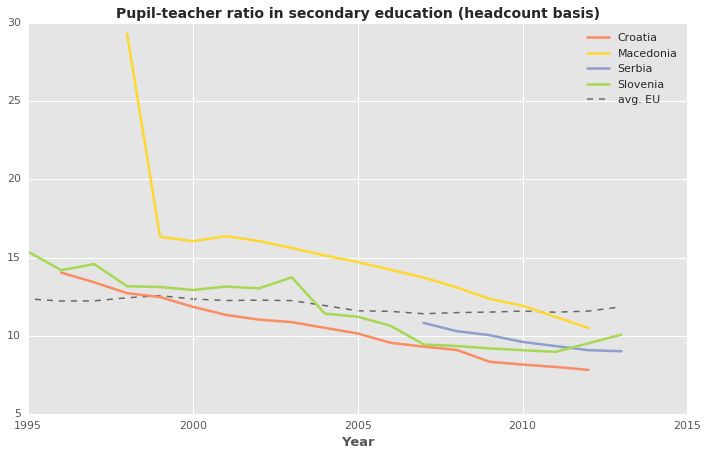

In [6]:
education = [
    ('education', 'NY.ADJ.AEDU.GN.ZS'), # education expenditure 
    ('literacy', 'SE.ADT.LITR.ZS'),     # Adult literacy rate
    ('teach_prim', 'SE.PRM.ENRL.TC.ZS'),# Pupil-teacher ratio in primary education
    ('teach_sec', 'SE.SEC.ENRL.TC.ZS'), # Pupil-teacher ratio in secondary education 
]

for indicator in education:
    plot_indicator(indicator, xlim=(1995, 2015))

Slovenia is constantly spending on education more than EU average.

Literacy rates have increased in all countries.

Pupil-teacher ratios in both primary and secondary education are on the fall (the exception beeing Slovenian primary education in 2000's).  
In Croatia, in mid 90's there were 50% more pupils per teacher than there are now.

## Economy

### GDP per capita

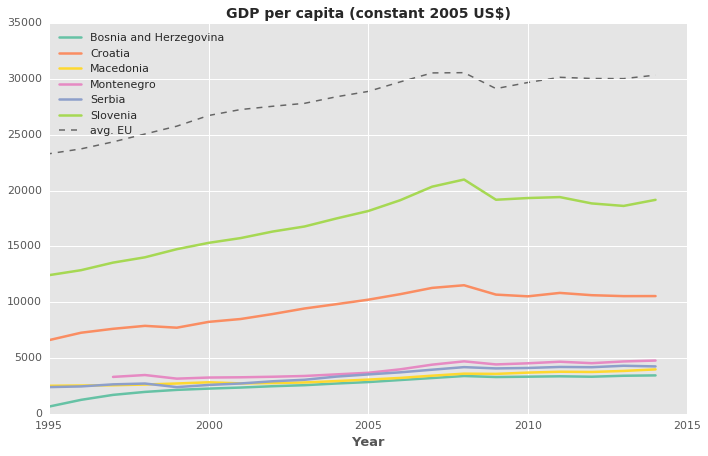

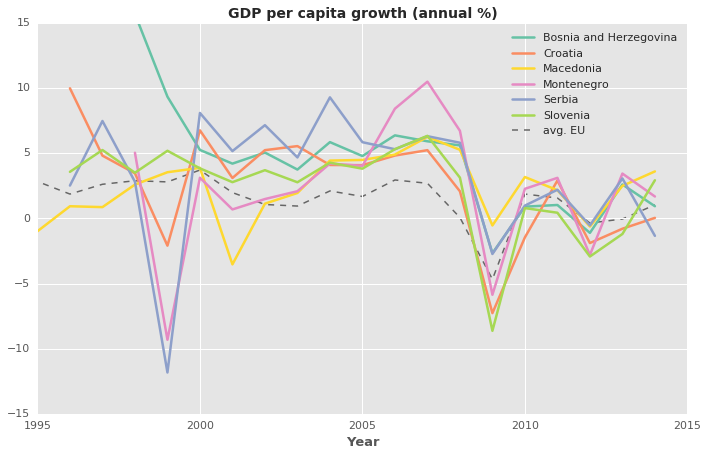

In [7]:
gdp = [
    ('gdp', 'NY.GDP.PCAP.KD'),          # GDP per capita 
    ('gdp_growth', 'NY.GDP.PCAP.KD.ZG'),# GDP per capita growth
]

for indicator in gdp:
    if indicator[0] == 'gdp_growth':
        plot_indicator(indicator, loc=0,
                       xlim=(1995, 2015), ylim=(-15, 15), 
                      )
    else:
        plot_indicator(indicator, loc=0, xlim=(1995, 2015))

Only Slovenia and Croatia stand out when it comes to GDP per capita. All other countries have GDP per capita lower than \$5000 (constant 2005 US$).

All countries in early 2000s (before the big economy crisis in 2008) had GDP growth higher than EU average. 
In 1999, values of Serbia and Montenegro show the consequences of [Kosovo war](https://en.wikipedia.org/wiki/Kosovo_War).

### Unemployment

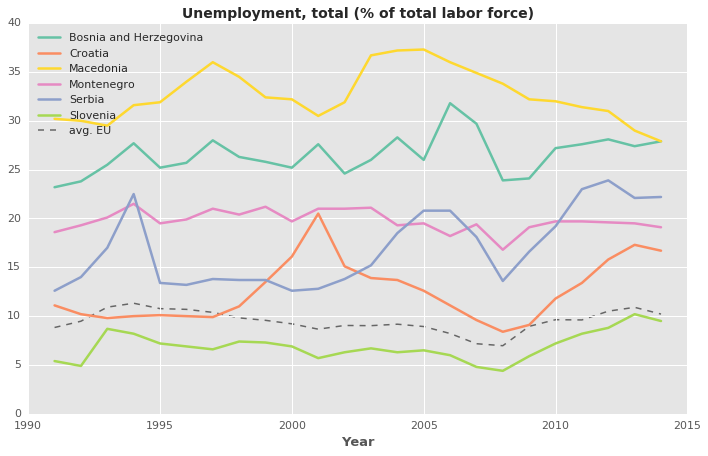

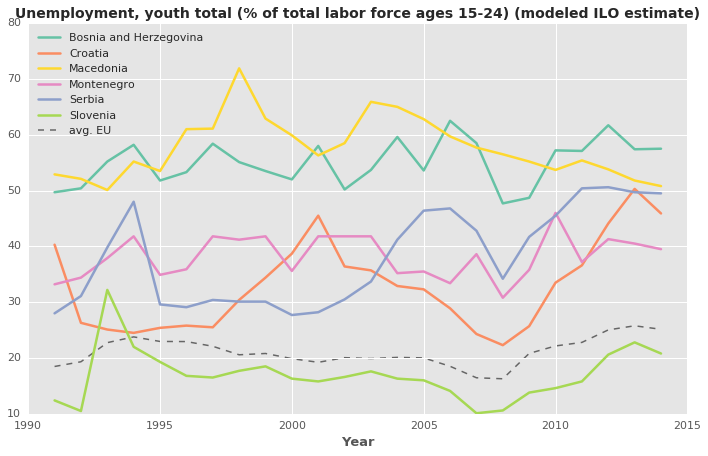

In [8]:
unemployment = [
    ('unemp', 'SL.UEM.TOTL.ZS'),       # Unemployment, total 
    ('unemp_young', 'SL.UEM.1524.ZS'), # Unemployment, youth total 
]

for indicator in unemployment:
    plot_indicator(indicator, loc=2)

Slovenia has always had lower unemployment than EU average.  
Croatia was getting close to EU average in 2008, but after the big economy crisis unemployment rates almost doubled. Slovenian and Serbian post-2008 unemployment rates show similar characteristics as Croatian. Other countries weren't as affected as those three.

Youth unemployment follows a similar pattern as general unemployment.

### Internet usage

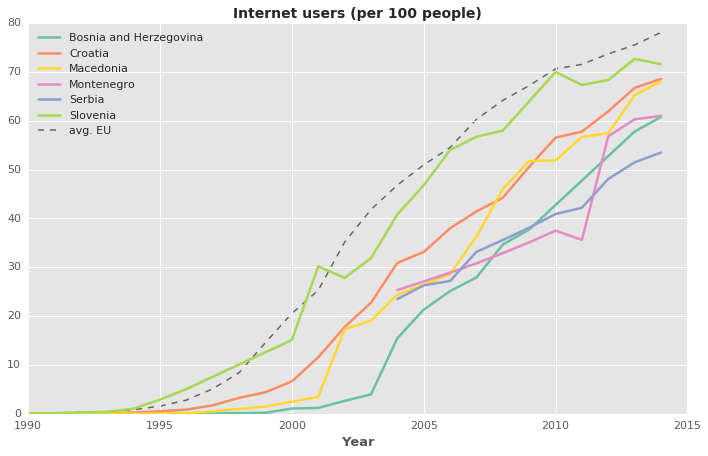

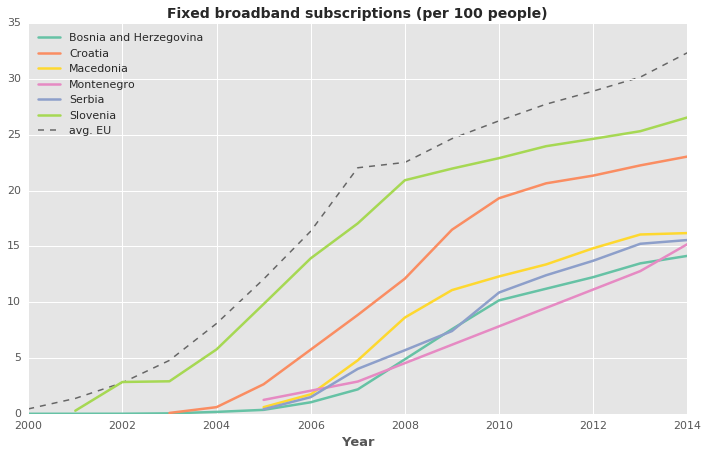

In [9]:
internet = [
    ('int_users', 'IT.NET.USER.P2'),    # Internet users 
    ('int_sups', 'IT.NET.BBND.P2'),     # Fixed broadband subscriptions 
]

for indicator in internet:
    plot_indicator(indicator, loc=0)

Slovenia is way ahead of other ex-YU countries when it comes to Internet users and had (relatively speaking) high Internet adoptation rates in the late 90's. One could say that Slovenia is about five years ahead of Bosnia, Serbia, and Montenegro.

Macedonia has about the same rate of Internet users as Croatia, but much lower rate of fixed broadband subscriptions.

### Import-Export

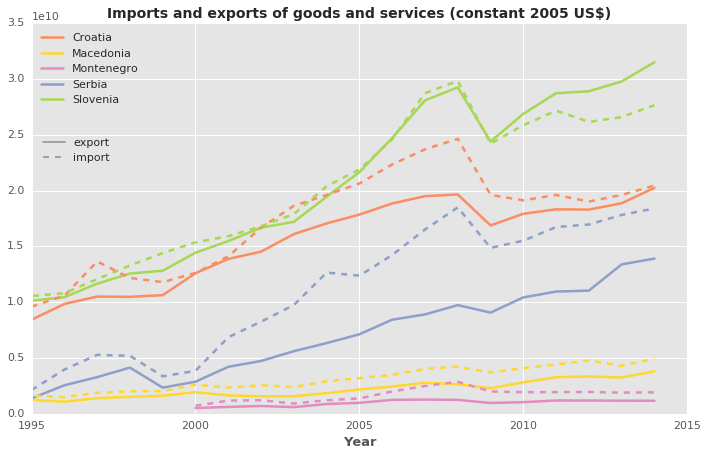

In [10]:
imp_exp = [
    ('export', 'NE.EXP.GNFS.KD'),   # Exports of goods and services 
    ('import', 'NE.IMP.GNFS.KD'),   # Imports of goods and services 
]

plot_indicator(imp_exp, drop_eu=True, loc=0, loc2=(0.01, 0.63),
               xlim=(1995, 2015), ylim=(0, 3.5e10),
               title='Imports and exports of goods and services (constant 2005 US$)')

Slovenian economy took a hit in 2008's economy crisis, but after it Slovenia managed to have higher export than import - something that other countries struggle to do.

### Energy usage

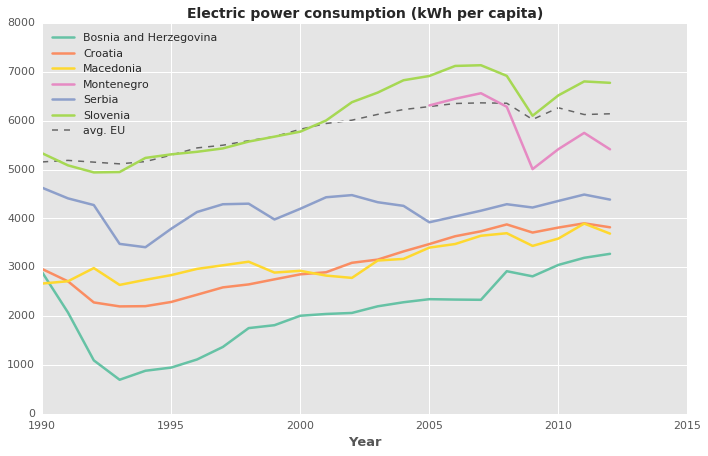

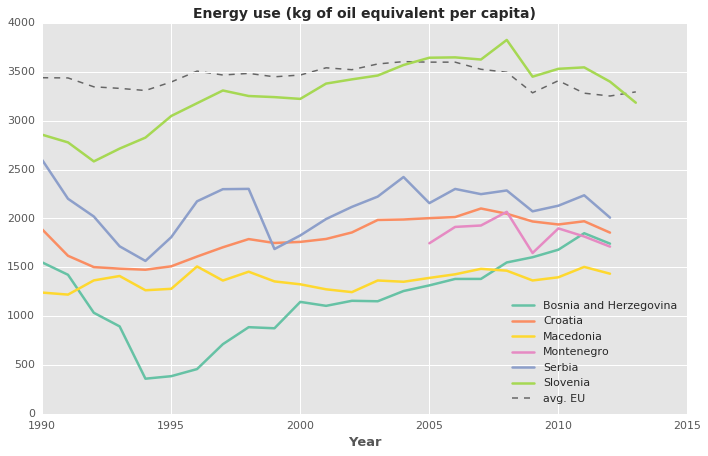

In [11]:
energetics = [
    ('electro', 'EG.USE.ELEC.KH.PC'),   # Electric power consumption 
    ('energy', 'EG.USE.PCAP.KG.OE'),    # Energy use 
]

for indicator in energetics:
    plot_indicator(indicator, loc=0)

While other countries had an increase of electric power consumption, Serbian values are almost the constant.

Bosnia managed to quadruple its energy use in 20 post-war years.

### Military / research / health

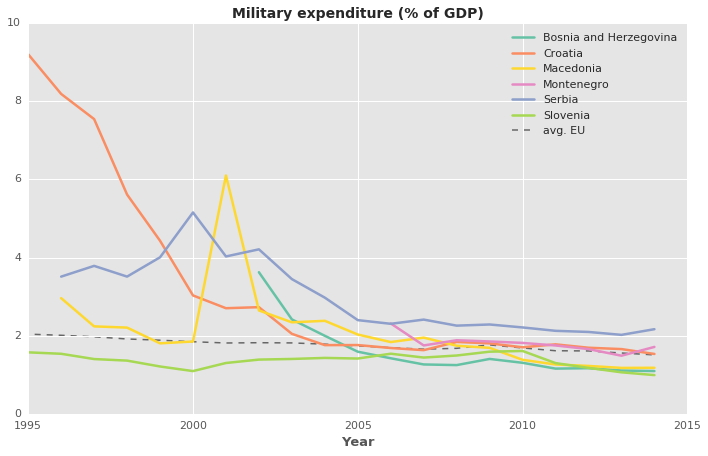

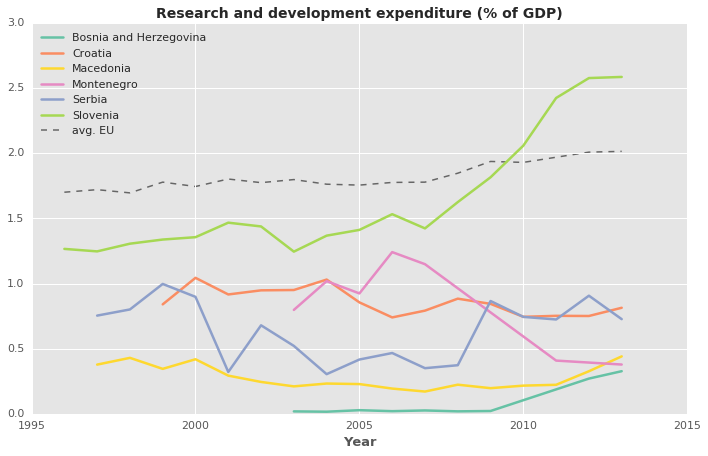

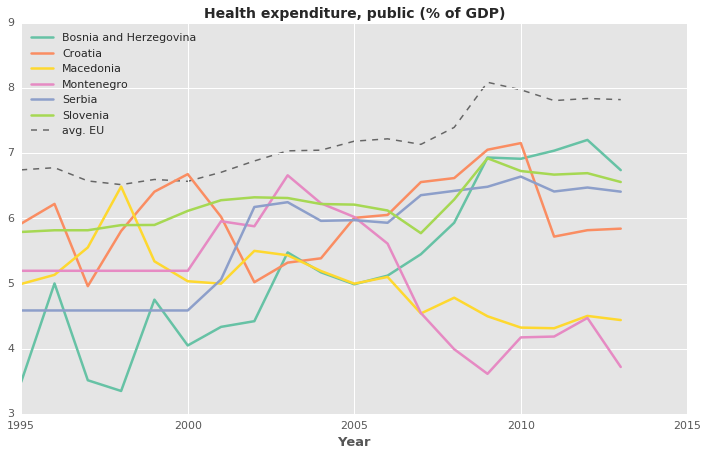

In [12]:
expenditures = [
    ('military', 'MS.MIL.XPND.GD.ZS'),  # Military expenditure 
    ('research', 'GB.XPD.RSDV.GD.ZS'),  # Research and development expenditure 
    ('health', 'SH.XPD.PUBL.ZS'),       # Health expenditure, public 
]

for indicator in expenditures:
    plot_indicator(indicator, xlim=(1995, 2015))

The spike in Macedonian military expenditure is due to [Albanian insurgency](https://en.wikipedia.org/wiki/2001_insurgency_in_the_Republic_of_Macedonia) in 2001.

Slovenia from 2007 onward spends more and more on research and development. Other countries spend less than 1% of their GDP on the R&D.

Health expenditure in all countries is below EU average.

## Conclusion 

25 years are a lot in a man's lifetime, but is it enough time to show changes of slow-living big creatures such as countries?  
The data shows that even one year (2008) is enough to shake some ground.

Having that in mind, did six ex-Yugoslavian republics manage to use 25 years constructively?

The biggest progress was made in lowering infant mortality rate, which is now around EU average of 0.4%. Life expectancy for all countries is now 75+ years (Slovenia 80+ years, EU average), even though health expenditure in all countries is below EU average.  
Birth rates decreased and all countries got significally older, both indicators follow trends in the whole Europe. 

Literacy rates have increased in all countries, and pupil-teacher ratios in both primary and secondary education are on the fall.  
Slovenia is constantly spending on education more than EU average, and in the last five years their expenditure on research and development is also higher than EU average. Other countries don't follow the Slovenian example, and are also several years behind Slovenia when it comes to number of Internet users.

Economically, all countries were doing relatively well until 2008.  
After 2008, unemployment rates got higher than ever in all countries except Macedonia, which seems to be the least affected by 2008 economic crisis.  
After the crisis Slovenia managed to have higher export than import - something that other countries struggle to do.

All countries have made some progress, but there is a room for lot more in the years to come. 

&nbsp;

&nbsp;
